<h1>비지도 학습에서의 데이터 변환</h1>
<br>
<div>
  <ul>
   <p>변환하는 이유는 시각화 / 데이터 압축 / 추가적인 처리를 위해서임</p>
   <p>주성분 분석이 가장 대표적인 방법</p>
  </ul>
</div>

<h3>주성분 분석 ( Principal Component Analysis )</h3>
<br>
<div>
  <ul>
   <p>feature들이 통계적으로 관계가 없도록 데이터를 변환</p>
   <p>만들어진 새로운 특성 중 일부만 선택</p>
   <p>고차원의 데이터의 경우 산점도를 그리기 쉽지 않음 -> 히스토그램이 쉬운 방법 </p>
   <p>누적설명력이 80%인 부분을 채택</p>
      <p>데이터의 분산이 가장 크고 수직은 성분 찾음</p>
  </ul>
</div>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [54]:
# code (https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

x = df.drop(['target'], axis=1).values
y = df['target'].values

"""
스케일링을 하지 않으면 분산량이 달라짐
scale을 하기 전 후 설명 가능한 분산량은 다르며 하지 않는다면,
설명 가능한 분산량이 왜곡될 수 있기 때문에 pca 전 표준화는 필수
분산량이 왜곡된다면 모델의 성능이 저하될 가능성
"""
x = StandardScaler().fit_transform(x)

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

각 주성분이 전체 데이터의 분산을 [0.72770452 0.23030523]만큼씩 설명
두개의 주성분이 전체 분산의 95.80097536148199%을 설명 가능


C:\Users\User\ADP\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


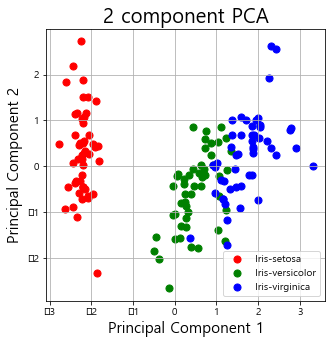

In [57]:
# 주성분의 개수 설정
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

print(f'각 주성분이 전체 데이터의 분산을 {pca.explained_variance_ratio_}만큼씩 설명')
print(f'두개의 주성분이 전체 분산의 {sum(pca.explained_variance_ratio_) * 100}%을 설명 가능')

"""
두 개의 주성분으로 꽃의 종들을 잘 구별할 수 있음을 확인
"""
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

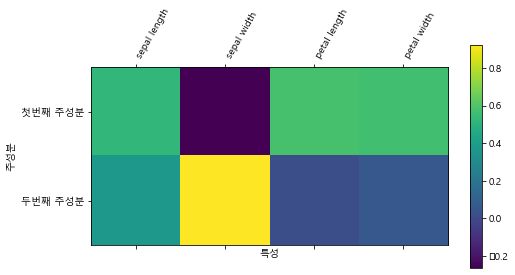

In [56]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['첫번째 주성분', '두번째 주성분'])
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')
plt.show()

In [52]:
# 주성분을 3으로 했을 때 마지막 주성분은 0.03만의 분산을 설명하기 때문에
# 2개의 주성분이 가장 적절
# pca = PCA(n_components=3)
# printcipalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', '3'])
# pca.explained_variance_ratio_